<a href="https://colab.research.google.com/github/akash-majhi/MovieRecommendation-Sytem1/blob/main/Digit_Recognition_Using_BackPropagation_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Digit Recognition using Back Propagation Algorithm*** 📸😃

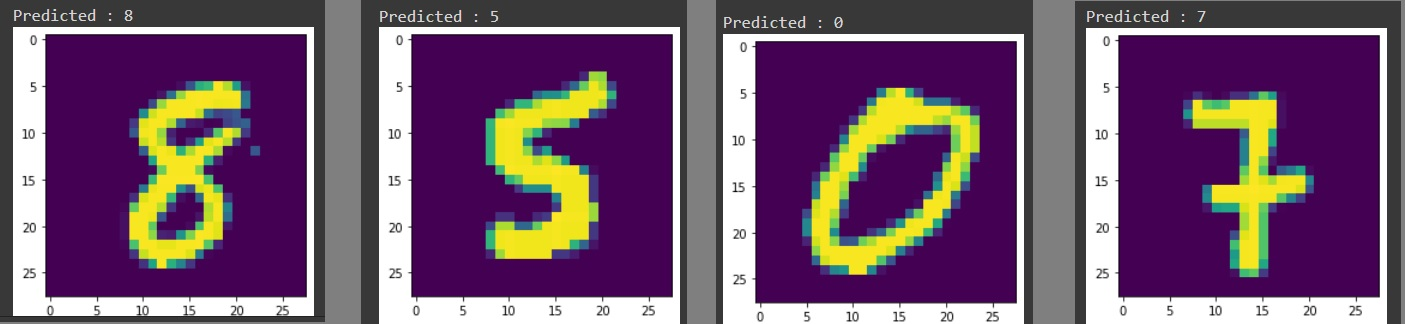

In [201]:
! nvidia-smi

Thu Apr 27 10:40:00 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## **Importing All Modules**

In [202]:
from pandas import read_csv
from matplotlib import pyplot as plt
from numpy import exp
from numpy.random import seed
from numpy.random import rand
from numpy import matmul
from numpy import matrix
from numpy import transpose as T
from numpy import multiply
from numpy import sqrt
from numpy import mean
from numpy import maximum
from numpy import c_
from numpy.random import shuffle
from numpy import argmax
from numpy import zeros
from google.colab import data_table
from google.colab import files
from matplotlib.pyplot import plot
data_table.enable_dataframe_formatter()
from google.colab import drive

## ***Fixing Seed for every random() events*:🙂**

In [203]:
seed(348322342)   #random

## ***Importing Training Datase***

### ***Downoading from Google drive***

In [204]:
drive.mount("/gdrive")
!ls "/gdrive/MyDrive/Colab Notebooks/"
!ls "/gdrive/MyDrive/Colab Notebooks/Test"

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
 19cs8168_modelling_assign1.ipynb
'Copy of Digit Recognition Using BackPropagation Algorithm.ipynb'
'Copy of Untitled1 (1).ipynb'
'Copy of Untitled1.ipynb'
 digit_recognizer_train.csv
 DLAKJKADHFJADF.IPNYB
 Test
 Untitled
 Untitled0.ipynb
 Untitled1.ipynb
 Untitled2.ipynb
 Untitled3.ipynb
one.png  qwe.png  t1.png      test1.png  tt.png   w.png
q.png	 rty.png  test10.png  test9.png  uio.png


### ***Reading Data***

In [205]:
raw_training_data = read_csv("/gdrive/MyDrive/Colab Notebooks/digit_recognizer_train.csv",delimiter = ",")
raw_training_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [206]:
raw_training_data.shape

(42000, 785)

In [207]:
(785 - 1)**.5

28.0

In [208]:
# i.e images are 28 pixel * 28 pixel 

### ***Converting Pandas dataframe to numpy matrix***

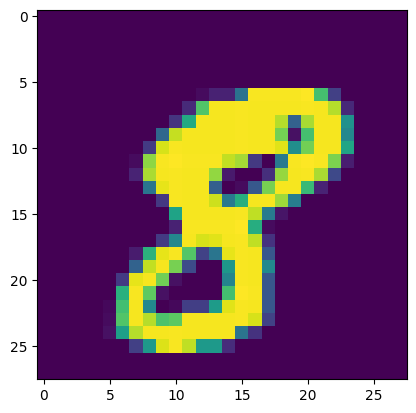

In [209]:
data = matrix(raw_training_data.to_numpy())
plt.imshow(data[10,1:].reshape((28, 28)) * 255)

### ***Function to Print from 28 * 28 pixel array***

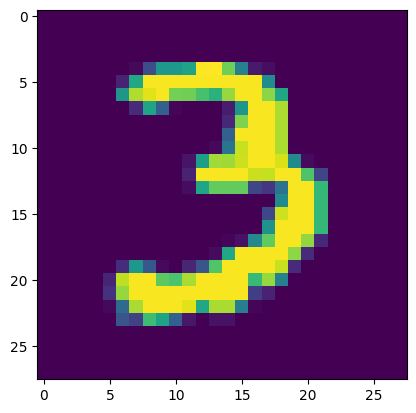

In [211]:
def print_image(X):
  plt.imshow(X.reshape((28, 28)) * 255)
  plt.show()

print_image(data[9,1:])

## ***All functions defination***

### ***Sigmoid Function***


> Sigmoid function is used as a activation function here

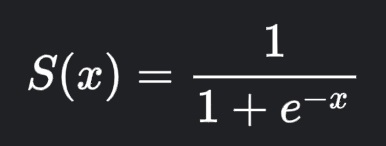





In [212]:
def Sigmoid(x):
  return 1/(1+exp(-x))

### ***Forward Propagartion***

In [213]:
def model(x,w1,w2):
  '''
    x => inputs
    w1,w2 => weights
  '''
  v1 = matmul(w1,x)
  hidden_layer_out = Sigmoid(v1)
  v2 = matmul(w2,hidden_layer_out)
  output = Sigmoid(v2)
  return [output,hidden_layer_out]

### ***Back Propagation***

In [214]:
def backPropagation(w1,w2,inputs,target):
  
  learning_factor = .1
  
  n = inputs[:,1].size
  for i in range(0,n):
    x = inputs[i,:].transpose()
    target_out = target[i,:].transpose()

    [output,hidden_layer_out] = model(x,w1,w2)

    ###Error at output layer
    error_out = target_out - output
    output_ = 1- output
    activation_negotiation_2 = multiply(output,output_)
    delta_out = multiply(activation_negotiation_2,error_out)

    ###Back Propagationg Output layer error to hidden layer
    w2_t = w2.transpose()
    error_hidden = matmul(w2_t,delta_out)
    hidden_layer_out_ = 1 - hidden_layer_out 
    activation_negotiation_1 = multiply(hidden_layer_out,hidden_layer_out_)
    delta_hidden = multiply(activation_negotiation_1,error_hidden)


    #w1 and w2 value correction
    hidden_layer_out_T = hidden_layer_out.transpose()
    x_T = x.transpose()
    dw2 = learning_factor * matmul(delta_out,hidden_layer_out_T)
    dw1 = learning_factor * matmul(delta_hidden,x_T)
    w2 = w2 + dw2 #updating w1
    w1 = w1 + dw1 #updating w1

  return [w1,w2]




### ***Output generated from our neural network***

In [215]:
def model_output(x,w1,w2):
  [output, _ ] = model(x,w1,w2)
  return argmax(output)


### ***Calculating Accuracy***

In [216]:
def accuracy(data,w1,w2):
  count = 0
  n = data[:,0].size
  for i in range(0,n):
    x = data[i,1:].transpose() / 256
    if model_output(x,w1,w2) == data[i,0]:
      count += 1    
  return  count/n

## ***Training Neural Netwok*** 😍😁😁😁😁
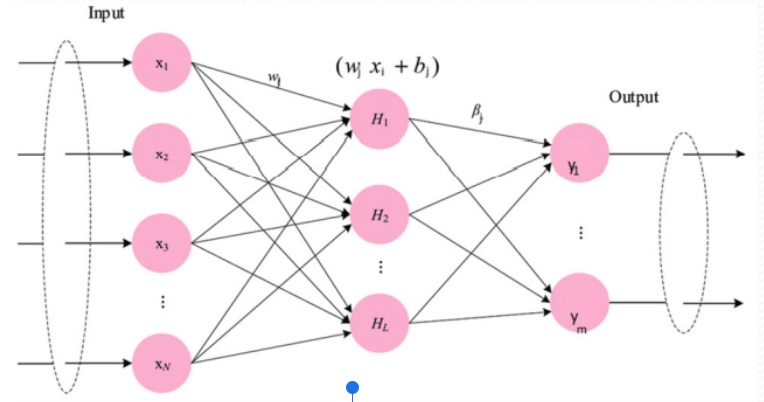

In [217]:
#Shuffleing Training Data
shuffle(data)


N = data[:,0].size    #Total numbers pf Training Data 
L_I = 28*28           #Number of Columns of Training input
L_O = 10              #Number of columns of Training output



target_data = zeros([N,10])
for i in range(0,N):
  target_data[i,data[i,0]] = 1
ratio = .8

## Dividing training set into Training and Testing data
training_data = matrix(data[ : int(ratio * N) , : ])
testing_data  = matrix(data[ int(ratio * N) + 1:  , : ])


training_input = training_data[:, 1:] / 256    #Normalising inputs b/w 0 to 1
testing_input = testing_data[:, 1:] / 256       #  (as max pixel value = 256)


# generating output target
# if , number = 2 then, training_target[i] = [0,0,1,0,0,0,0,0,0,0]
# if , number = 3 then, training_target[i] = [0,0,0,1,0,0,0,0,0,0]
# if , number = 4 then, training_target[i] = [0,0,0,0,1,0,0,0,0,0]

training_target = matrix(target_data[ : int(ratio * N) , : ])
testing_target = matrix(target_data[ int(ratio * N) + 1:  , : ])


In [218]:
X = training_input    #Renamimg just for ease to code
D = training_target

T_X = testing_input
T_D = testing_target



num_neurones = 10   #Number of hidden layer neurones/Nodes
iteration = 1       #Number of iteration

o_w1 = 2 * matrix(rand(num_neurones,X[0,:].size)) - 1
o_w2 = 2 * matrix(rand(D[0,:].size,num_neurones)) - 1
o_training_accuracy = 0


for i in range(0,iteration):

  w1 = 2 * matrix(rand(num_neurones,X[0,:].size)) - 1 #input weight-matrix with random value b/w -1,+1
  w2 = 2 * matrix(rand(D[0,:].size,num_neurones)) - 1 #hidden-layer weight-matrix with random value b/w -1,+1


  #epoch
  for epoch in range(0,50):
    [w1,w2] = backPropagation(w1,w2,X,D)
    training_accuracy = accuracy(training_data,w1,w2)
    print(f"Iteration : {iteration}",f"Epoch : {epoch}","Trainig data accuracy : ", training_accuracy , "Testing data accuracy :" , accuracy(testing_data,w1,w2))


  print(f"Final:","Trainig data accuracy : ", accuracy(training_data,w1,w2), "Testing data accuracy :" , accuracy(training_data,w1,w2))

  if  (o_training_accuracy < training_accuracy):
    o_training_accuracy = training_accuracy
    o_w1 = w1
    o_w2 = w2

w1 = o_w1
w2 = o_w2
print("Optimum Training accuracy : ", o_training_accuracy)
print("Optimum Testing accuracy :",accuracy(testing_data,w1,w2) )

Iteration : 1 Epoch : 0 Trainig data accuracy :  0.863452380952381 Testing data accuracy : 0.853434932730087
Iteration : 1 Epoch : 1 Trainig data accuracy :  0.8917261904761905 Testing data accuracy : 0.8821288248601024
Iteration : 1 Epoch : 2 Trainig data accuracy :  0.9033630952380952 Testing data accuracy : 0.8934396952018098
Iteration : 1 Epoch : 3 Trainig data accuracy :  0.909702380952381 Testing data accuracy : 0.8990355994761281
Iteration : 1 Epoch : 4 Trainig data accuracy :  0.9114583333333334 Testing data accuracy : 0.9002262174068342
Iteration : 1 Epoch : 5 Trainig data accuracy :  0.9148214285714286 Testing data accuracy : 0.901774020716752
Iteration : 1 Epoch : 6 Trainig data accuracy :  0.9201785714285714 Testing data accuracy : 0.9045124419573759
Iteration : 1 Epoch : 7 Trainig data accuracy :  0.9212202380952381 Testing data accuracy : 0.9045124419573759
Iteration : 1 Epoch : 8 Trainig data accuracy :  0.9214583333333334 Testing data accuracy : 0.90534587450887
Iterati

## **Accuracy of whole training data set** 😎

In [219]:
print ("Whole Training dataset accuracy : " , accuracy(data,w1,w2)*100 , "%") 

Whole Training dataset accuracy :  92.95 %


## ***Manually Checking***

In [220]:
def manual_check(index):
  print("Predicted :" , model_output(data[index,1:].transpose()/256,w1,w2))
  print_image(data[index,1:].transpose())

Predicted : 2


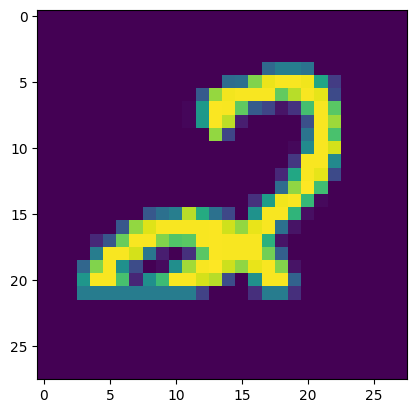

In [221]:
manual_check(69)

Predicted : 4


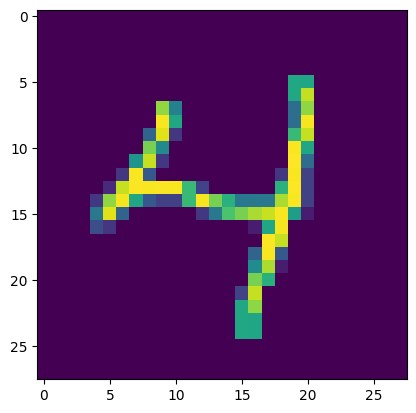



Predicted : 0


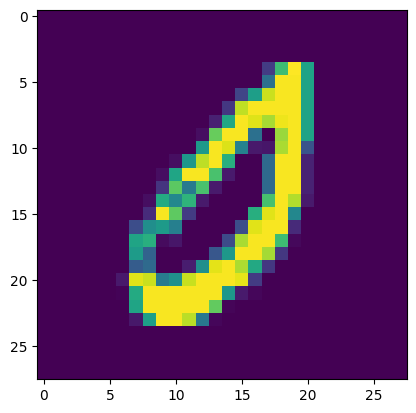



Predicted : 9


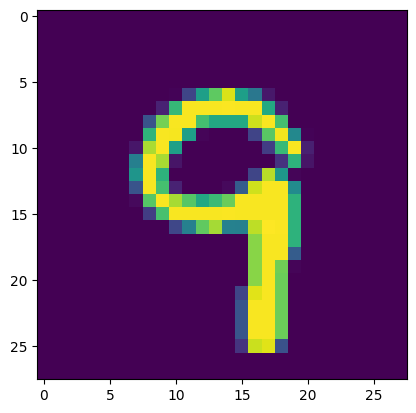



Predicted : 0


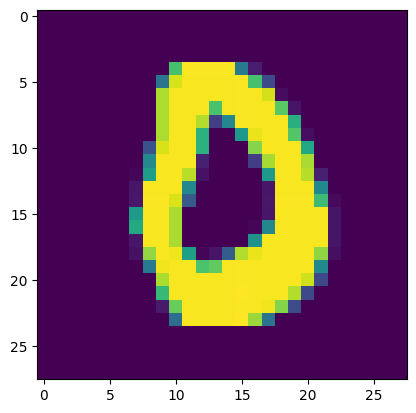



Predicted : 0


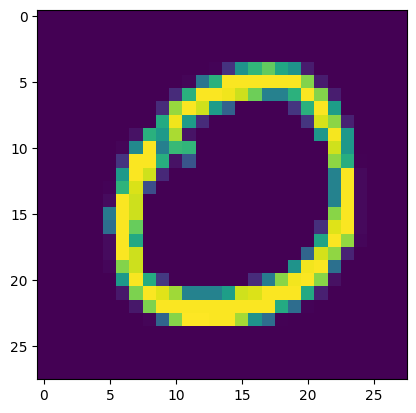



Predicted : 0


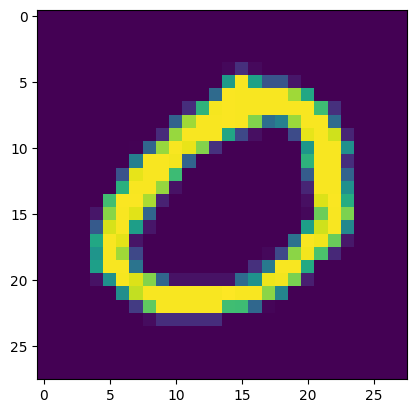



Predicted : 5


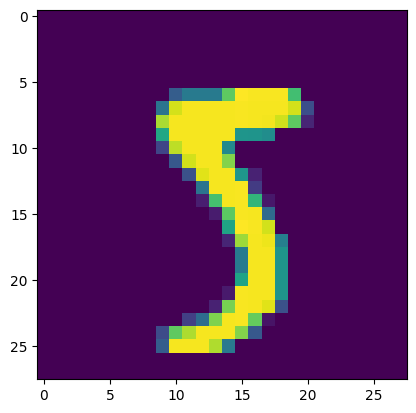



Predicted : 4


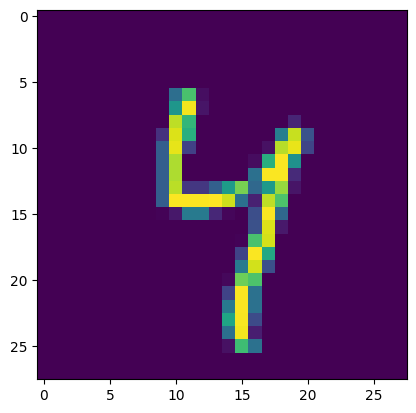



Predicted : 0


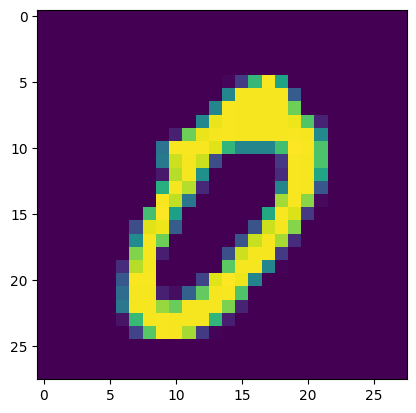



Predicted : 4


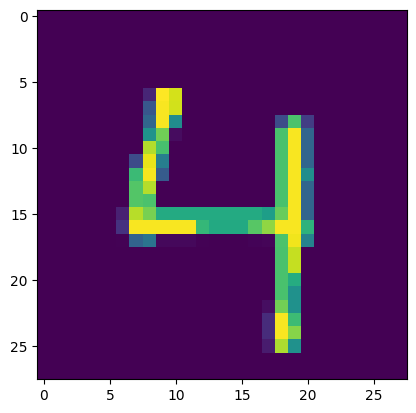



Predicted : 6


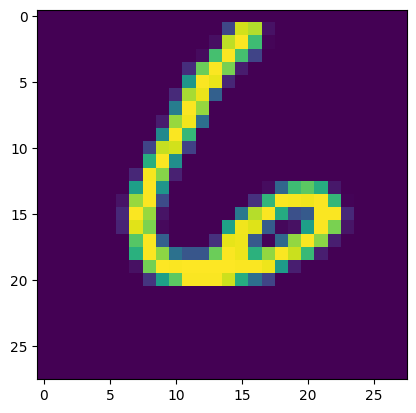



Predicted : 9


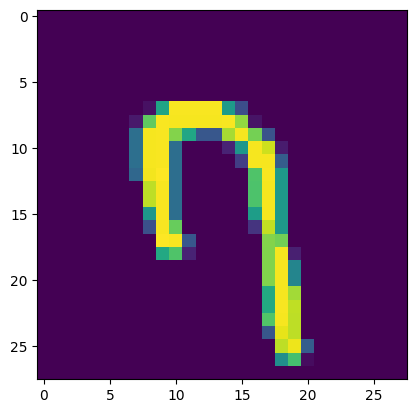



Predicted : 4


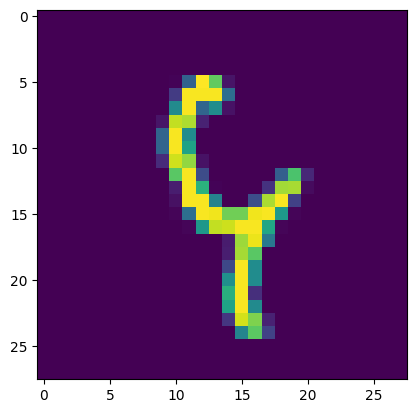



Predicted : 6


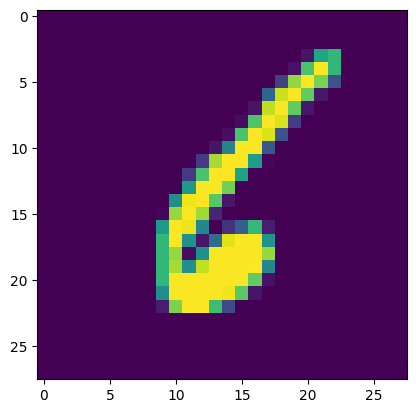



Predicted : 8


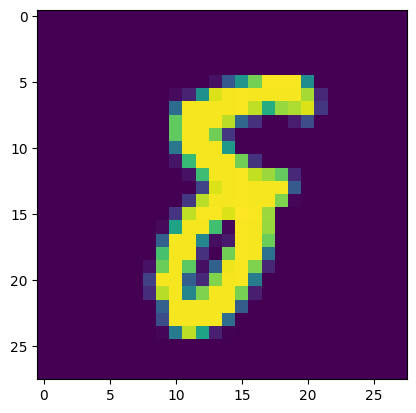



Predicted : 1


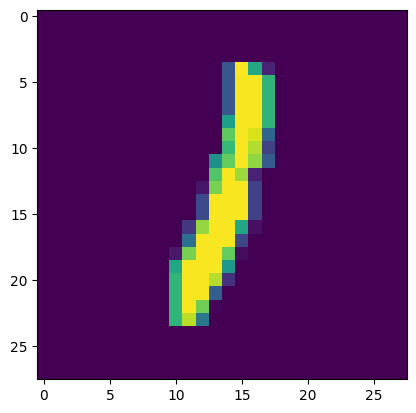



Predicted : 1


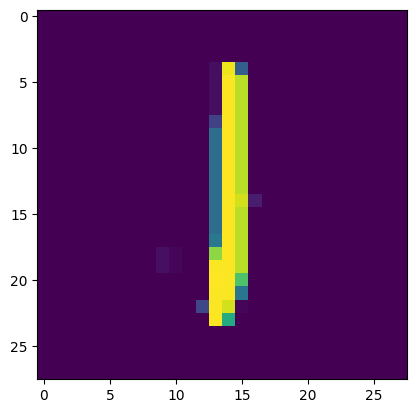



Predicted : 3


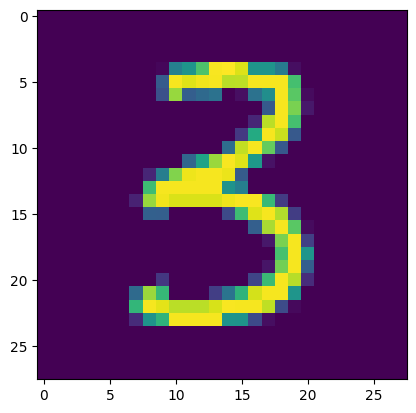



Predicted : 7


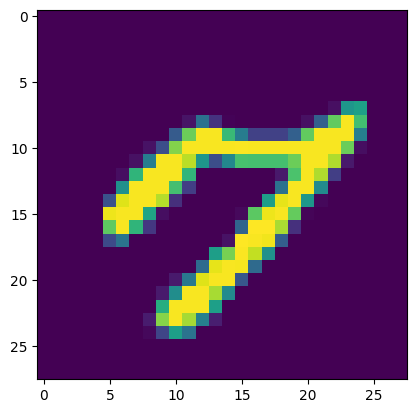



Predicted : 2


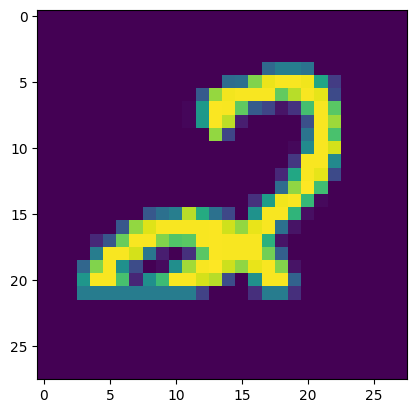



Predicted : 2


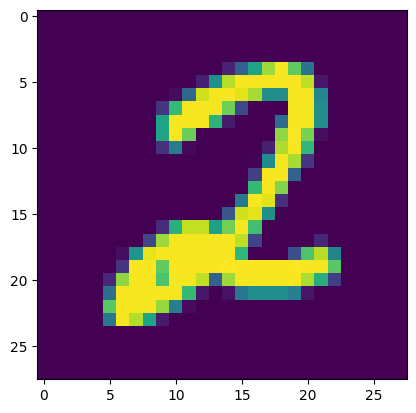



Predicted : 2


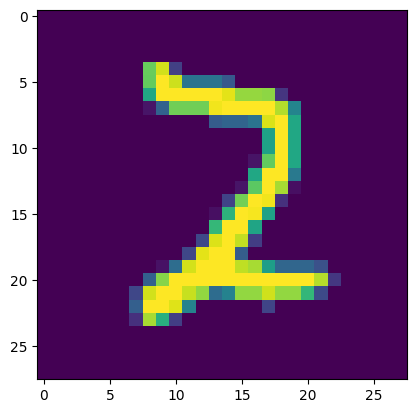



Predicted : 6


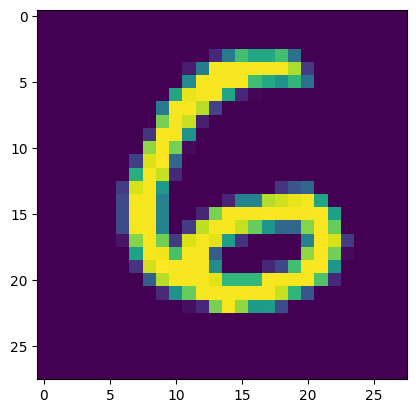



Predicted : 3


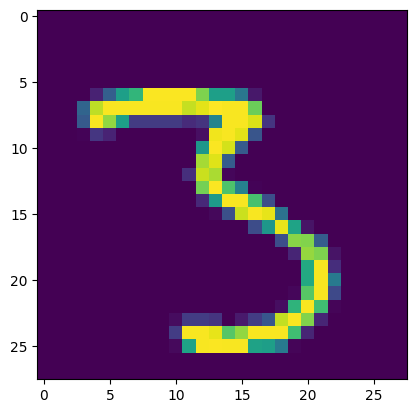



Predicted : 9


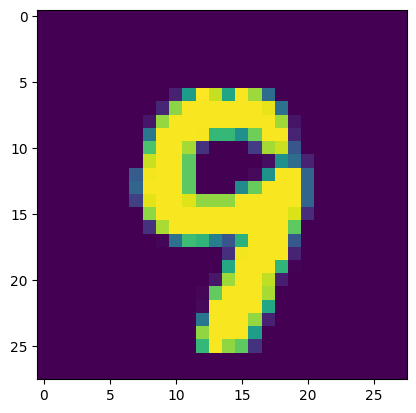



Predicted : 0


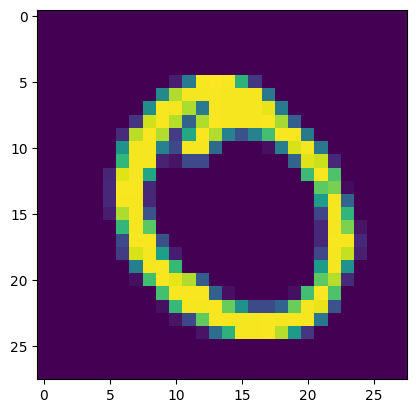



Predicted : 4


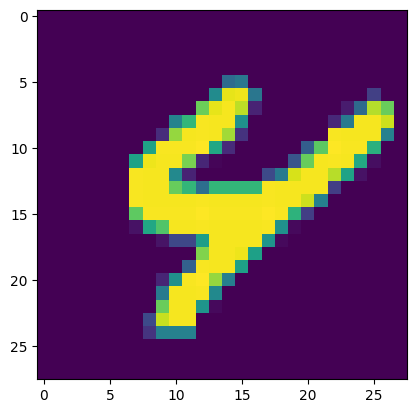



Predicted : 3


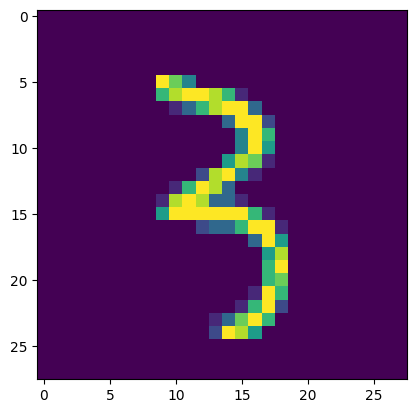



Predicted : 9


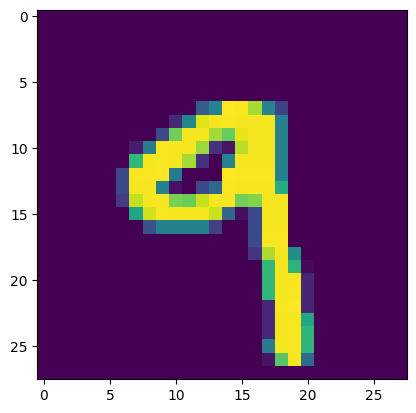



Predicted : 0


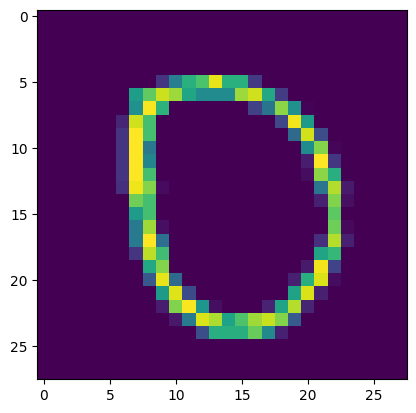



Predicted : 1


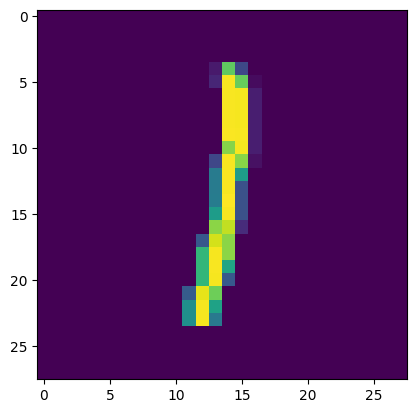



Predicted : 1


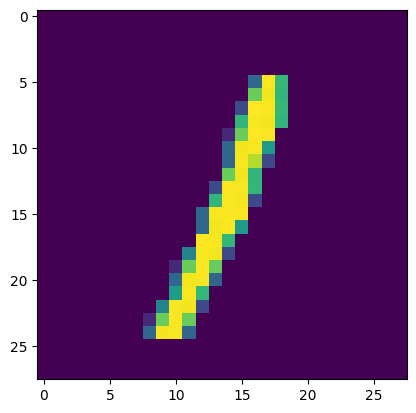



Predicted : 4


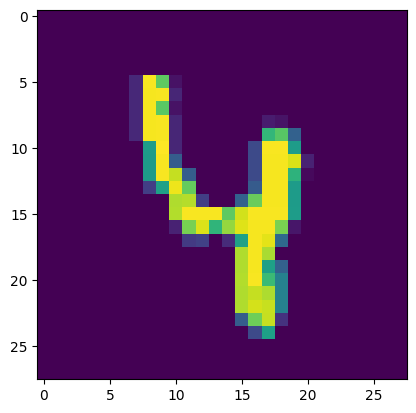



Predicted : 4


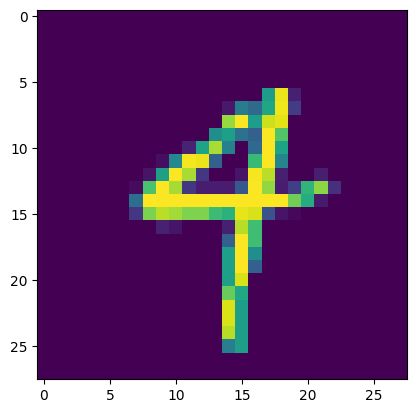



Predicted : 4


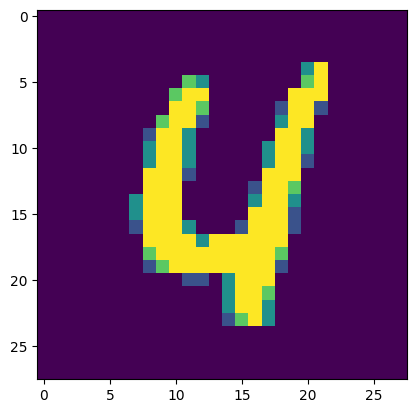



Predicted : 1


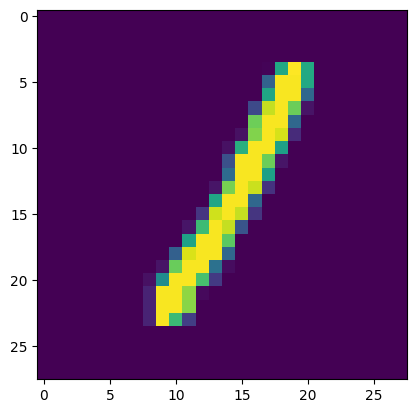



Predicted : 8


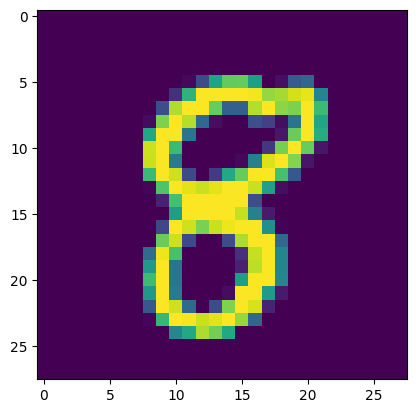



Predicted : 9


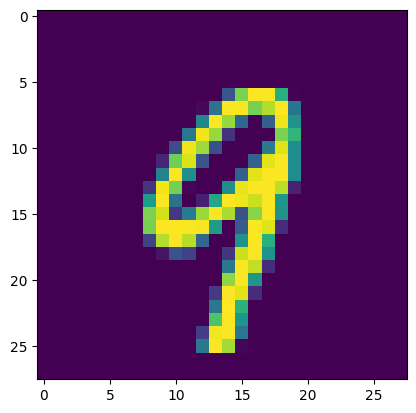



Predicted : 7


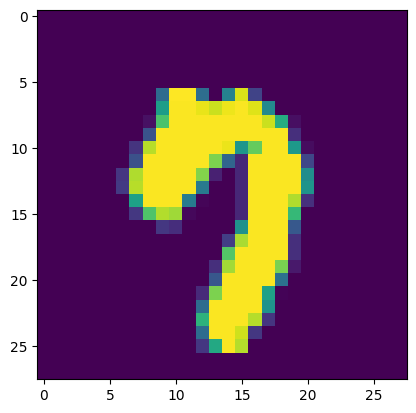



Predicted : 1


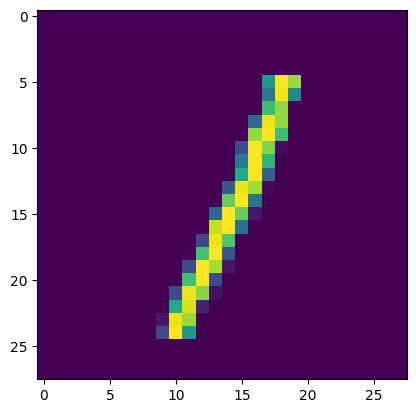



Predicted : 0


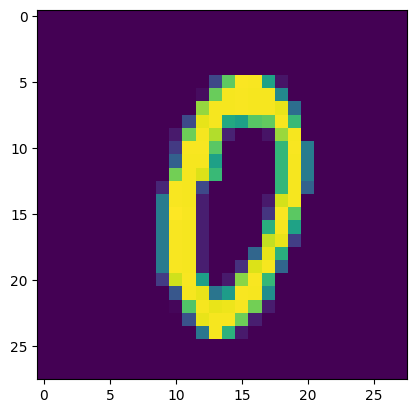



Predicted : 6


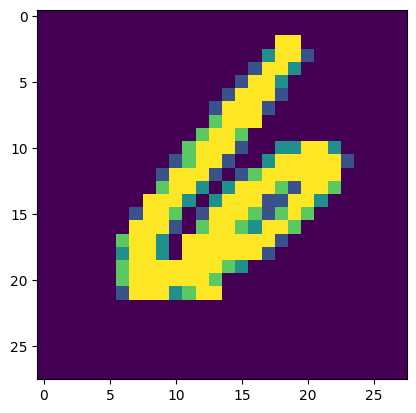



Predicted : 5


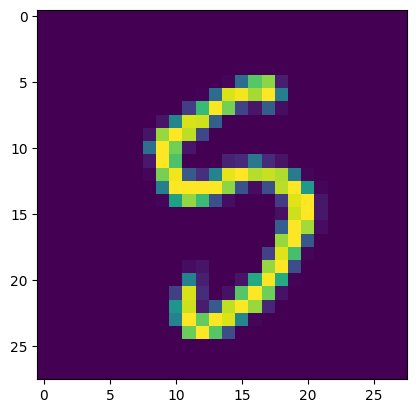



Predicted : 9


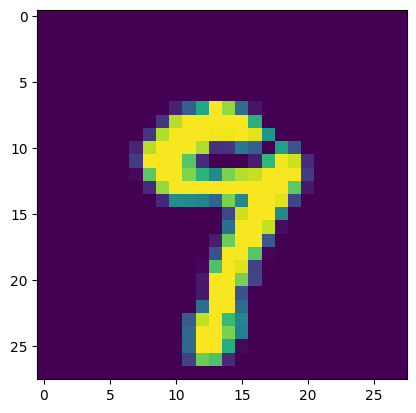



Predicted : 6


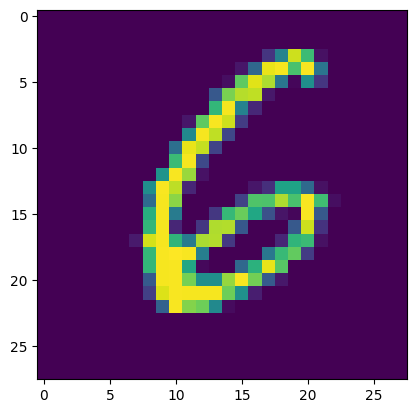



Predicted : 1


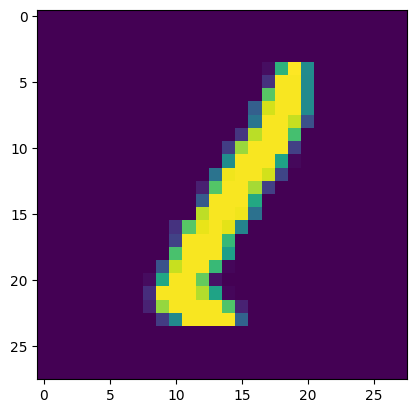



Predicted : 9


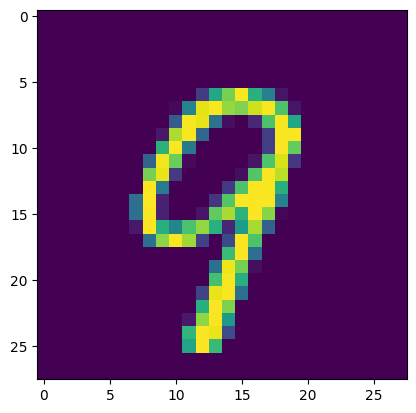



Predicted : 9


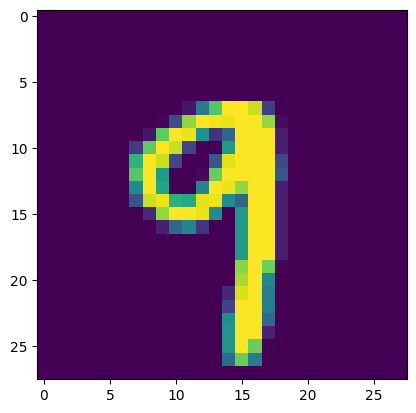



Predicted : 7


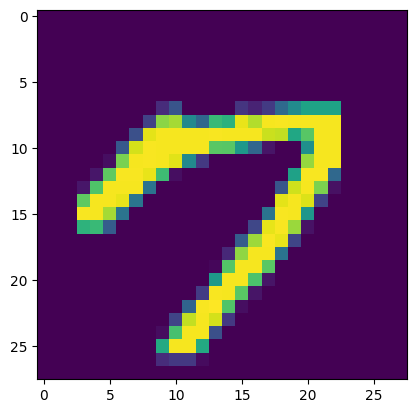



Predicted : 7


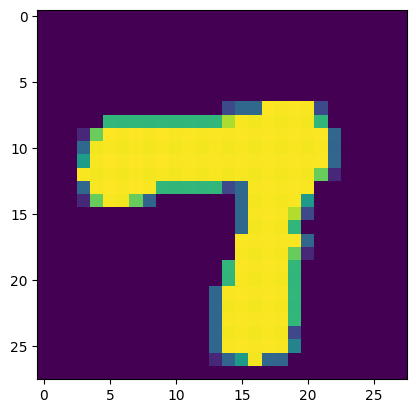

In [222]:
for i in range(50,100):
  manual_check(i)
  print("\n")

In [223]:
!pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [224]:
def predictLive(fileName):
  #drive.mount("/gdrive",force_remount=True)
  from PIL import Image
  from numpy import asarray
  image = Image.open(fileName).convert('L').resize((28,28))
  imageData = asarray(image)
  print_image(imageData.flatten())
  print("Predicted :" , model_output((256-matrix(imageData.flatten()).transpose())/256,w1,w2))

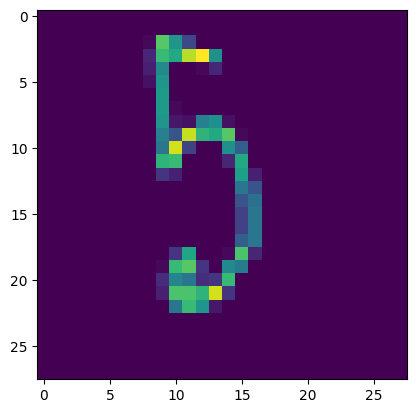

Predicted : 5


In [225]:
predictLive("/gdrive/MyDrive/Colab Notebooks/Test/test1.png")

In [226]:
drive.mount("/gdrive",force_remount=True)
!ls "/gdrive/MyDrive/Colab Notebooks/Test"

Mounted at /gdrive
one.png  qwe.png  t1.png      test1.png  tt.png   w.png
q.png	 rty.png  test10.png  test9.png  uio.png


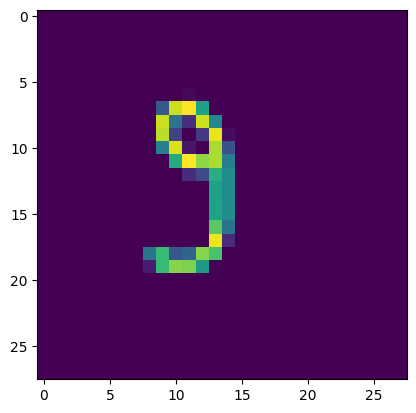

Predicted : 8


In [227]:
from PIL import Image
from numpy import asarray
image = Image.open('/gdrive/MyDrive/Colab Notebooks/Test/test10.png').convert('L').resize((28,28))
imageData = asarray(image)
print_image(((matrix(imageData.flatten()).transpose())/256))
print("Predicted :" , model_output(((matrix(imageData.flatten()).transpose())/256),w1,w2))

SyntaxError: ignored

In [179]:
data[0]

matrix([[  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 162, 231,  92,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,